<a href="https://colab.research.google.com/github/BiancaBianchi/FATEC-MECATRONICA-0791811011-BIANCA/blob/master/Exerc_aula6_11_AnaliseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de dados de http://dadosabertos.dataprev.gov.br/storage/f/2020-03-06T20%3A51%3A14.394Z/concedidos-fev2020.csv, do mês de fevereiro de 2020

In [31]:
#Notebook para analise de dados
import pandas as pd

In [32]:
#Carrega um conjunto de dados para analise
#https://dados.gov.br/dataset/beneficios-concedidos
!wget --no-check-certificate http://dadosabertos.dataprev.gov.br/storage/f/2020-03-06T20%3A51%3A14.394Z/concedidos-fev2020.csv

--2020-11-06 13:03:43--  http://dadosabertos.dataprev.gov.br/storage/f/2020-03-06T20%3A51%3A14.394Z/concedidos-fev2020.csv
Resolving dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)... 200.152.32.122
Connecting to dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)|200.152.32.122|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dadosabertos.dataprev.gov.br/storage/f/2020-03-06T20%3A51%3A14.394Z/concedidos-fev2020.csv [following]
--2020-11-06 13:03:44--  https://dadosabertos.dataprev.gov.br/storage/f/2020-03-06T20%3A51%3A14.394Z/concedidos-fev2020.csv
Connecting to dadosabertos.dataprev.gov.br (dadosabertos.dataprev.gov.br)|200.152.32.122|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 65896561 (63M) [text/csv]
Saving to: ‘concedidos-fev2020.csv’

concedidos-fev2020. 100%[===================>]  62.84M   189KB/s    in 3m 50s  

2020-11-06 13:07:

In [33]:
#abrir um arquivo
dados_raw = pd.read_csv('/content/concedidos-fev2020.csv', sep=';', encoding = "ISO-8859-1")

In [34]:
dados_raw

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
0,202002,Aposentadoria por Idade,000000,Zerados,Concessao Normal,05/04/1962,Feminino,09194-MA-Raposa,Não Informado,Segurado Especial,Ceará,"1,000"
1,202002,Aposent. Tempo de Serviço de Professor,000000,Zerados,Concessao Normal,05/10/1968,Feminino,14203-PR-Realeza,Não Informado,Empregado,Maranhão,"1,000"
2,202002,Aposentadoria por Tempo de Contribuição,000000,Zerados,Concessao Normal,26/02/1963,Masculino,19429-RS-Xangri-lá,Não Informado,Autônomo,Maranhão,"3,741"
3,202002,Aposentadoria por Tempo de Contribuição,000000,Zerados,Concessao Normal,08/06/1959,Masculino,14268-PR-Umuarama,Não Informado,Facultativo,Minas Gerais,"3,114"
4,202002,Aposentadoria por Idade,000000,Zerados,Concessao Normal,23/08/1959,Masculino,14259-PR-Terra Boa,Não Informado,Segurado Especial,Minas Gerais,"1,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
389571,202002,Aposentadoria Invalidez Previdenciária,000000,Zerados,Concessao Decorrente de Acao Judicial,23/04/1964,Masculino,28003-TO-Alvorada,Não Informado,Desempregado,Tocantins,"2,205"
389572,202002,Amp. Social Pessoa Portadora Deficiencia,000000,Zerados,Concessao Decorrente de Acao Judicial,08/11/1956,Masculino,04119-BA-Iaçu,Não Informado,Autônomo,Tocantins,"1,000"
389573,202002,Aposentadoria por Idade,000000,Zerados,Concessao Decorrente de Acao Judicial,10/01/1955,Masculino,04171-BA-Itiúba,Não Informado,Segurado Especial,Tocantins,"1,000"
389574,202002,Aposentadoria Invalidez Previdenciária,000000,Zerados,Concessao Decorrente de Acao Judicial,09/05/1961,Masculino,26044-RO-Cujubim,Não Informado,Segurado Especial,Tocantins,"1,000"


In [35]:
dados_raw.shape

(389576, 12)

In [36]:
dados_raw.columns

Index(['Competência concessão', 'Espécie', 'CID', 'CID.1', 'Despacho',
       'Dt Nascimento', 'Sexo.', 'Mun Resid', 'Vínculo dependentes',
       'Forma Filiação', 'UF', 'Qt SM RMI'],
      dtype='object')

In [37]:
dados_raw.describe()

,Competência concessão
count,389576.0
mean,202002.0
std,0.0
min,202002.0
25%,202002.0
50%,202002.0
75%,202002.0
max,202002.0


In [38]:
dados_raw.dtypes

Competência concessão     int64
Espécie                  object
CID                      object
CID.1                    object
Despacho                 object
Dt Nascimento            object
Sexo.                    object
Mun Resid                object
Vínculo dependentes      object
Forma Filiação           object
UF                       object
Qt SM RMI                object
dtype: object

In [39]:
#Converter a coluna 'Qt SM RMI' para float

dados_raw['Qt SM RMI'] = dados_raw['Qt SM RMI'].replace({',':'.'}, regex=True)

In [56]:
dados_raw = dados_raw.astype({'Qt SM RMI':float}, copy=False)

In [55]:
dados_raw.dtypes

Competência concessão      int64
Espécie                   object
CID                       object
CID.1                     object
Despacho                  object
Dt Nascimento             object
Sexo.                     object
Mun Resid                 object
Vínculo dependentes       object
Forma Filiação            object
UF                        object
Qt SM RMI                float64
dtype: object

In [57]:
dados_raw['Qt SM RMI'].describe()

count    389576.000000
mean          1.379109
std           0.794034
min           0.001000
25%           1.000000
50%           1.000000
75%           1.382000
max          52.767000
Name: Qt SM RMI, dtype: float64

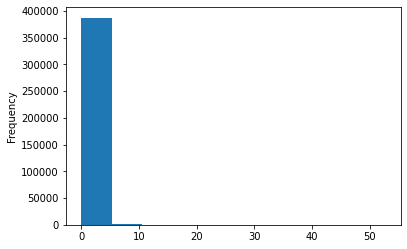

In [58]:
dados_raw['Qt SM RMI'].plot.hist()

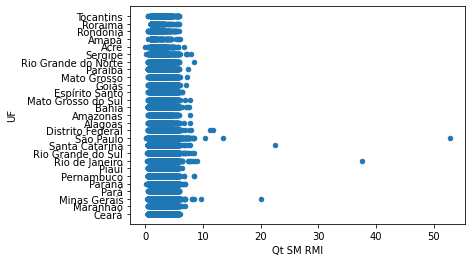

In [76]:
dados_raw.plot.scatter(x='Qt SM RMI', y="UF")

In [48]:
dados_raw[dados_raw['Qt SM RMI'] ==  52.767000]

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
148178,202002,Pensão por Morte de Anistiados,000000,Zerados,Concessao Normal,19/03/1930,Feminino,21163-SP-Franca,Ex-Cônjuge,Empregado,São Paulo,52.767


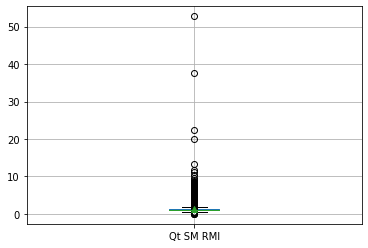

In [49]:
dados_raw.boxplot(column=['Qt SM RMI'], showmeans=True)

In [50]:
#https://www.alura.com.br/artigos/como-remover-linhas-e-colunas-no-pandas
dados_filtrados = dados_raw[dados_raw['Qt SM RMI'] < 10]

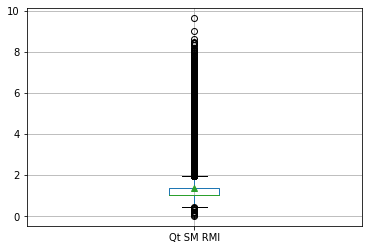

In [51]:
dados_filtrados.boxplot(column=['Qt SM RMI'], showmeans=True)

In [83]:
dados_raw[dados_raw['Qt SM RMI'] > 10
          ]

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI
49313,202002,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,10/09/1974,Feminino,21131-SP-Cotia,Filho Adotivo,Empregado,Minas Gerais,20.040
94221,202002,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,30/01/1971,Feminino,21504-SP-São Paulo,Filho Adotivo,Empregado,Rio de Janeiro,37.601
119982,202002,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,24/12/1979,Feminino,17081-RJ-Rio das Ostras,Filho Adotivo,Empregado,Santa Catarina,22.473
148178,202002,Pensão por Morte de Anistiados,000000,Zerados,Concessao Normal,19/03/1930,Feminino,21163-SP-Franca,Ex-Cônjuge,Empregado,São Paulo,52.767
216596,202002,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,08/03/1990,Feminino,15111-PE-Petrolina,Filho,Empregado,Distrito Federal,11.702
293764,202002,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,11/12/1972,Feminino,21504-SP-São Paulo,Filho Adotivo,Empregado,São Paulo,13.444
309522,202002,Aposentadoria Especial,000000,Zerados,Concessao Normal,23/09/1945,Feminino,21486-SP-Santos,Ex-Cônjuge,Empregado,São Paulo,10.270
324060,202002,Auxílio Salario Maternidade,000000,Zerados,Concessao Normal,23/06/1976,Feminino,07049-ES-São Mateus,Filho,Empregado,Distrito Federal,11.124


In [84]:
by_category= dados_raw.groupby("Espécie")

In [85]:
by_category.describe()

Competência concessão  ... Qt SM RMI
                                                         count  ...       max
Espécie                                                         ...          
Amp. Social Pessoa Portadora Deficiencia                9239.0  ...     1.018
Amparo Social ao Idoso                                 21431.0  ...     1.047
Aposent. Invalidez Acidente Trabalho                     305.0  ...     7.603
Aposent. Tempo de Serviço de Professor                  1103.0  ...     5.687
Aposentadoria Especial                                  1661.0  ...    10.270
Aposentadoria Invalidez Previdenciária                  8028.0  ...     8.408
Aposentadoria por Idade                                47046.0  ...     6.040
Aposentadoria por Invalidez-Trab. Rural                    2.0  ...     1.000
Aposentadoria por Tempo de Contribuição                27882.0  ...     8.598
Auxílio Acidente                                        1755.0  ...     4.203
Auxílio Acidente Previdenciário                          895.0  ...     3.852
Auxílio Doenca Previdenciário                         170191.0  ...     6.074
Auxílio Doenca por Acidente do Trabalho                11993.0  ...     5.851
Auxílio Reclusão                                         907.0  ...     3.915
Auxílio Salario Maternidade                            59397.0  ...    37.601
Auxílio Suplementar Acidente Trabalho                      6.0  ...     1.000
Benefício Indenizatório a Cargo da União                 259.0  ...     1.000
Pensao Especial Hanseniase Lei 11520/07                    5.0  ...     1.973
Pensão Vitalícia Dependentes Seringueiro                   6.0  ...     2.000
Pensão Vitalícia Sindrome Talidomida                       1.0  ...     0.912
Pensão por Morte Acidente do Trabalho                     12.0  ...     4.627
Pensão por Morte Previdenciária                        27443.0  ...     7.927
Pensão por Morte de Anistiados                             2.0  ...    52.767
Pensão por Morte de Ex-Combatente                          3.0  ...     5.918
Pensão por Morte de Trabalhador Rural                      3.0  ...     1.000
Renda Mensal Vitalícia por Incapacidade                    1.0  ...     1.000

[26 rows x 16 columns]

In [88]:
by_category["Qt SM RMI"].describe()

,count,mean,std,min,25%,50%,75%,max
Espécie,,,,,,,,
Amp. Social Pessoa Portadora Deficiencia,9239.0,0.999997,0.000504,0.955,1.00000,1.0000,1.00000,1.018
Amparo Social ao Idoso,21431.0,1.000006,0.000533,1.000,1.00000,1.0000,1.00000,1.047
Aposent. Invalidez Acidente Trabalho,305.0,1.870459,1.106477,1.000,1.06500,1.4400,2.24400,7.603
Aposent. Tempo de Serviço de Professor,1103.0,2.352503,1.078909,1.000,1.52750,2.1660,2.97600,5.687
Aposentadoria Especial,1661.0,3.637176,1.594551,1.000,2.24800,3.5170,5.17600,10.270
Aposentadoria Invalidez Previdenciária,8028.0,1.433763,0.795733,0.050,1.00000,1.0100,1.54400,8.408
Aposentadoria por Idade,47046.0,1.147937,0.553933,0.156,1.00000,1.0000,1.00000,6.040
Aposentadoria por Invalidez-Trab. Rural,2.0,1.000000,0.000000,1.000,1.00000,1.0000,1.00000,1.000
Aposentadoria por Tempo de Contribuição,27882.0,2.311546,1.261972,0.638,1.21700,1.9640,3.13200,8.598
